### Pair Programming III: Ajuste

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings("ignore")

Los objetivos de esta lección son:
- Realizar el ajuste o ajustes de los modelos
- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

#### Vamos a ver los datos del modelo estandarizado y codificado:

In [2]:
df = pd.read_pickle('data/airline_estand_encod.pkl')
df.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,food_and_drink,gate_location,...,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,dep_conv_0,dep_conv_1,dep_conv_2,dep_conv_3,dep_conv_4,dep_conv_5
0,1,1,1,0.250000,1,0,-0.122137,4,4,3,...,2,4,3,0.0,0,0,0,0,0,1
1,0,1,1,0.583333,1,0,-0.715013,0,0,2,...,0,0,0,0.0,0,0,1,0,0,0


In [3]:
#Vamos a crear dataframes los train/test: 
X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [4]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [5]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
39087,1,1,Train
30893,1,1,Train
45278,1,1,Train
16398,1,1,Train
13653,1,1,Train


Vamos a ver ahora la matriz de confusión:

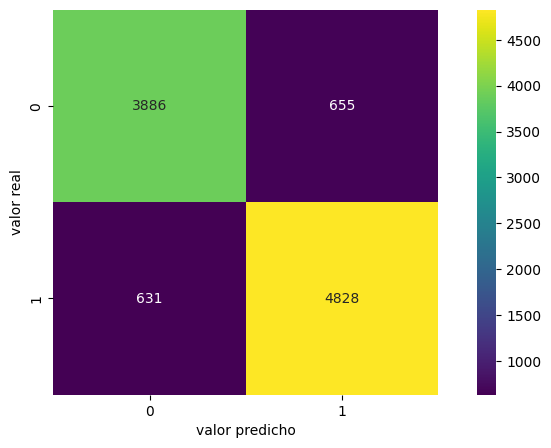

In [6]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (10, 5))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

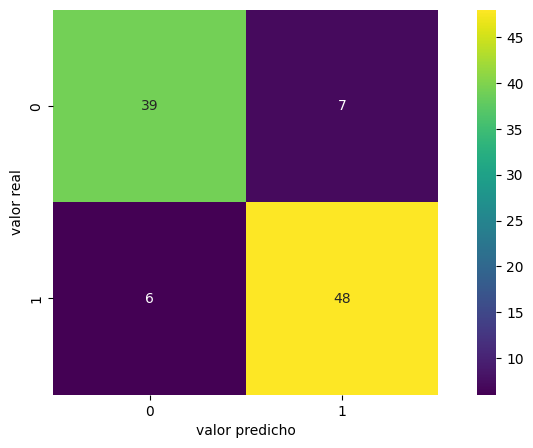

In [7]:
# Para facilitar la lectura, vamos a extraer los mismos datos pero en porcentaje:

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)
mat_lr1_porc = (mat_lr1*100/len(y_test1)).round(0).astype("int")

plt.figure(figsize = (10, 5))
sns.heatmap(mat_lr1_porc, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

A la vista de los resultados de la matriz de confusión, en general, podemos ver que este modelo parece "acertar" bastante: acierta en un 87% de los casos, teniendo un 6% de falsos negativos y 7% de falsos positivos.

#### Vamos a ver los datos del modelo sin estandarizar y codificadas:

In [8]:
df2 = pd.read_pickle('data/airline_encod.pkl')
df2.head(2)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,food_and_drink,gate_location,...,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,dep_conv_0,dep_conv_1,dep_conv_2,dep_conv_3,dep_conv_4,dep_conv_5
0,1,1,1,46,1,0,1777,4,4,3,...,2,4,3,0,0,0,0,0,0,1
1,0,1,1,54,1,0,1078,0,0,2,...,0,0,0,0,0,0,1,0,0,0


In [9]:
#Vamos a crear dataframes los train/test: 
X2 = df2.drop("satisfaction", axis = 1)
y2 = df2["satisfaction"]

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg.fit(x_train2,y_train2)

y_pred_train = log_reg.predict(x_train2)

y_pred_test = log_reg.predict(x_test2)

train_df2 = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train2)})
test_df2  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test2)})
resultados2 = pd.concat([train_df2,test_df2], axis = 0)
resultados2.head()

/home/useradd/anaconda3/envs/adalabenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Real,Predicted,Set
39087,1,1,Train
30893,1,1,Train
45278,1,1,Train
16398,1,1,Train
13653,1,1,Train


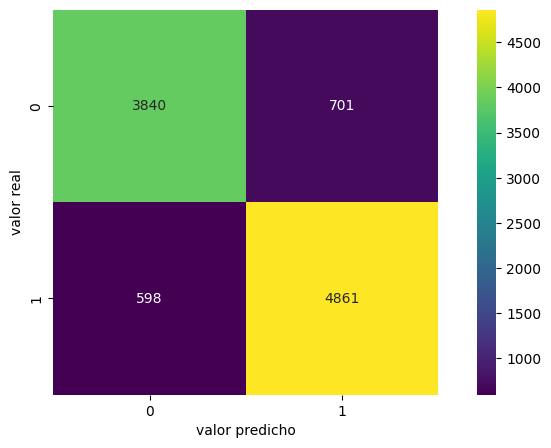

In [10]:
mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (10, 5))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

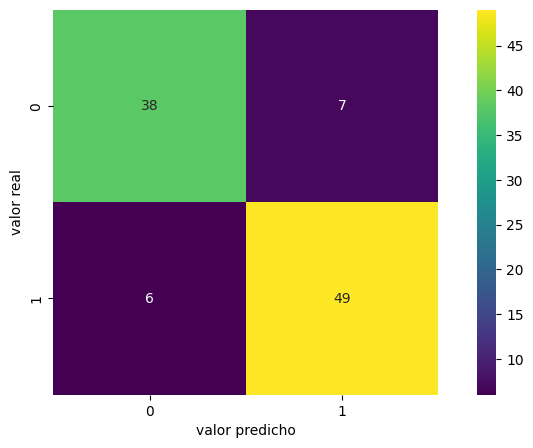

In [11]:
# Para facilitar la lectura, vamos a extraer los mismos datos pero en porcentaje:

mat_lr2 = confusion_matrix(y_test2, y_pred_test)
mat_lr2_porc = (mat_lr2*100/len(y_test2)).round(0).astype("int")

plt.figure(figsize = (10, 5))
sns.heatmap(mat_lr2_porc, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Sorprendentemente, el que pierde de verdaderos negativos, lo gana de verdaderos positivos, pero los resultados de falsos negativos y falsos positivos, son iguales. Podríamos afirmar que, en este caso, no hay diferencias entre utilizar nuestro modelo estandarizado o sin estandarizar (tiene sentido puesto que nuestro dataframe, de 23 columnas, tan solo 3 eran numéricas).

Aunque en nuestro  caso no es necesario porque nuestros data VR está muy balanceada (55-45%), vamos a probar a balancearla y así comparamos los cuatro modelos (estandarizado/balanceado)

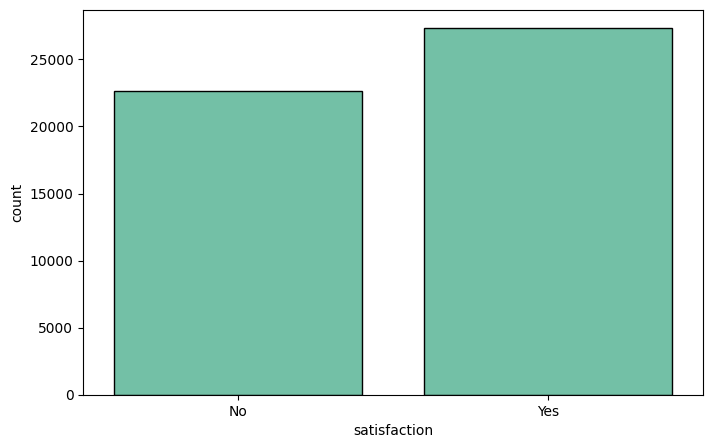

In [50]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "satisfaction",  color = "mediumaquamarine",  edgecolor='black')

fig1.set(xticklabels=["No", "Yes"]) 

plt.show()

Como tenemos muchos datos, vamos a hacer un downsampling:

In [53]:
X = df.drop("satisfaction", axis = 1)
y = df["satisfaction"]

down = RandomUnderSampler()

X_down, y_down = down.fit_resample(X,y)

balanceado = pd.concat([X_down, y_down], axis = 1)
balanceado.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,food_and_drink,gate_location,inflight_wifi_service,...,cleanliness,online_boarding,departure_delay_in_minutes,dep_conv_0,dep_conv_1,dep_conv_2,dep_conv_3,dep_conv_4,dep_conv_5,satisfaction
1,1,1,0.583333,1,0,-0.715013,0,0,2,2,...,0,0,0.000000,0,0,1,0,0,0,0
3,0,0,-0.625000,0,1,0.145038,0,0,0,4,...,3,5,0.000000,0,0,0,0,0,1,0
4,1,1,0.000000,1,1,-0.279898,0,4,2,1,...,3,0,1.083333,0,0,1,0,0,0,0
7,1,0,-0.791667,1,1,-0.216285,1,1,1,4,...,0,5,2.500000,0,0,0,0,1,0,0
8,1,1,0.333333,1,0,1.016115,3,0,2,0,...,3,3,1.916667,0,0,1,0,0,0,0


In [54]:
# Lo guardamos para comprobar después las métricas:

balanceado.to_pickle('data/airline_estand_encod_bal.pkl')

In [56]:
X3 = balanceado.drop("satisfaction", axis = 1)
y3 = balanceado["satisfaction"]

x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [57]:
log_reg_bal = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg_bal.fit(x_train3,y_train3)

y_pred_train_bal = log_reg_bal.predict(x_train3)

y_pred_test_bal = log_reg_bal.predict(x_test3)

In [59]:
train_df_bal = pd.DataFrame({'Real': y_train3, 'Predicted': y_pred_train_bal, 'Set': ['Train']*len(y_train3)})
test_df_bal  = pd.DataFrame({'Real': y_test3,  'Predicted': y_pred_test_bal,  'Set': ['Test']*len(y_test3)})

In [61]:
resultados_bal = pd.concat([train_df_bal,test_df_bal], axis = 0)
resultados_bal.head()

,Real,Predicted,Set
40198,0,0,Train
42304,1,1,Train
22664,1,1,Train
17500,1,1,Train
17032,1,0,Train


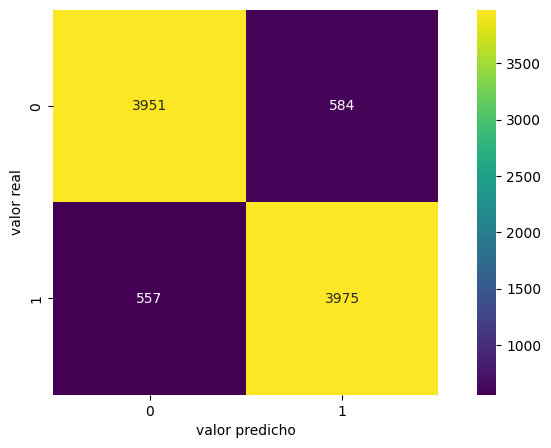

In [62]:
mat_lr3 = confusion_matrix(y_test3, y_pred_test_bal)

plt.figure(figsize = (10, 5))
sns.heatmap(mat_lr3, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

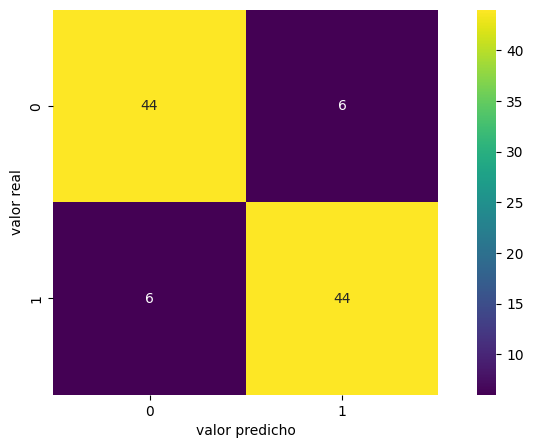

In [65]:
mat_lr3 = confusion_matrix(y_test3, y_pred_test_bal)
mat_lr3_porc = (mat_lr3*100/len(y_test3)).round(0).astype("int")

plt.figure(figsize = (10, 5))
sns.heatmap(mat_lr3_porc, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()